## **Network Intrusion Detection System**

- UGR Network Dataset

Perform the project as follows;
- Machine Learning Models
  - UnSupervised. AE and GAN
     
      - Anomaly Detection

In [4]:
import os

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import numpy as np
import socket
import struct
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)
# Drop 'label' column if it exists

# Drop 'label' and 'bin_label' columns
columns_to_drop = ['label', 'bin_label']
normal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
abnormal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Drop 'date_time' column if it exists
if 'date_time' in normal_df.columns:
    normal_df.drop(columns=['date_time'], inplace=True)
if 'date_time' in abnormal_df.columns:
    abnormal_df.drop(columns=['date_time'], inplace=True)
# Drop 'date_time' column from both datasets if it exists
normal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
abnormal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
# Drop 'label' column if it exists
if 'label' in normal_df.columns:
    normal_df.drop(columns=['label'], inplace=True)
if 'label' in abnormal_df.columns:
    abnormal_df.drop(columns=['label'], inplace=True)


# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    # Convert IP address from string to binary format
    packed_ip = socket.inet_aton(ip)
    # Unpack binary IP and return as integer
    return struct.unpack("!I", packed_ip)[0]

# Apply IP conversion function to 'source_ip' and 'destination_ip' in both datasets
for df in [normal_df, abnormal_df]:
    df['source_ip'] = df['source_ip'].apply(ip_to_int)
    df['destination_ip'] = df['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Initialize mappings dictionary
mappings = {}

# Perform label encoding for categorical features and store mappings
for feature in categorical_features:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit and transform the feature in normal_samples and abnormal_samples
    normal_df[feature] = label_encoder.fit_transform(normal_df[feature])
    abnormal_df[feature] = label_encoder.fit_transform(abnormal_df[feature])
    # Store the mapping for later use
    mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}

# Save mappings for later use
#dump(mappings, '/content/drive/MyDrive/azizah_alqahtani_project/new codes/mappings.joblib')
# Save mappings to a text file
with open("mappings.txt", "w") as f:
    for feature, mapping in mappings.items():
        f.write(f"Encoding for {feature}: {mapping}\n")

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port','forwarding_status', 'tos', 'packets', 'bytes']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in normal samples
normal_df[numerical_features] = scaler.fit_transform(normal_df[numerical_features])

# Transform the numerical features in abnormal samples using the same scaler
abnormal_df[numerical_features] = scaler.transform(abnormal_df[numerical_features])

# Print the first few rows of the scaled numerical features in normal samples
print("First few rows of scaled numerical features in normal samples:")
print(normal_df[numerical_features].head())

# Print the first few rows of the scaled numerical features in abnormal samples
print("First few rows of scaled numerical features in abnormal samples:")
print(abnormal_df[numerical_features].head())

#
# Save the DataFrames to CSV files
normal_df.to_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/normal_samples.csv', index=False)
abnormal_df.to_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/abnormal_samples.csv', index=False)



First few rows of scaled numerical features in normal samples:
       duration  source_ip  destination_ip  source_port  destination_port  \
7270  -0.137704  -0.712944       -0.755931    -0.978816          1.392096   
860   -0.186119  -0.724521        1.877488     1.404236         -0.860698   
5390  -0.176615  -0.712944       -0.755931    -0.978816          0.247652   
13418 -0.181636  -0.724521       -0.421223    -0.993791          0.986234   
5191  -0.171953  -0.724522        1.224933    -0.978816         -0.133595   

       forwarding_status       tos   packets     bytes  
7270                 0.0 -0.410210 -0.021171 -0.025517  
860                  0.0 -0.410210 -0.027923 -0.026707  
5390                 0.0 -0.410210 -0.026081 -0.026533  
13418                0.0  2.655951 -0.026695 -0.026645  
5191                 0.0 -0.410210 -0.021171 -0.021136  
First few rows of scaled numerical features in abnormal samples:
       duration  source_ip  destination_ip  source_port  destinatio

In [17]:
import pandas as pd
import numpy as np
import socket
import struct
from sklearn.preprocessing import StandardScaler, LabelEncoder
from joblib import dump

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)

# Drop 'label' and 'bin_label' columns if they exist
columns_to_drop = ['label', 'bin_label', 'date_time']
normal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
abnormal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Drop 'date_time' column if it exists (already done above)
# Drop 'label' column if it exists (already done above)

# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    packed_ip = socket.inet_aton(ip)
    return struct.unpack("!I", packed_ip)[0]

# Apply IP conversion function to 'source_ip' and 'destination_ip' in both datasets
for df in [normal_df, abnormal_df]:
    if 'source_ip' in df.columns and 'destination_ip' in df.columns:
        df['source_ip'] = df['source_ip'].apply(ip_to_int)
        df['destination_ip'] = df['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']
mappings = {}

# Perform label encoding for categorical features and store mappings
for feature in categorical_features:
    if feature in normal_df.columns and feature in abnormal_df.columns:
        label_encoder = LabelEncoder()
        # Fit and transform the feature in normal and abnormal samples
        normal_df[feature] = label_encoder.fit_transform(normal_df[feature])
        abnormal_df[feature] = label_encoder.transform(abnormal_df[feature])
        # Store the mapping for later use
        mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}

# Save mappings for later use
dump(mappings, '/content/drive/MyDrive/azizah_alqahtani_project/new_codes/mappings.joblib')
# Save mappings to a text file
with open("/content/drive/MyDrive/azizah_alqahtani_project/new_codes/mappings.txt", "w") as f:
    for feature, mapping in mappings.items():
        f.write(f"Encoding for {feature}: {mapping}\n")

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'forwarding_status', 'tos', 'packets', 'bytes']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in normal samples
normal_df[numerical_features] = scaler.fit_transform(normal_df[numerical_features])

# Transform the numerical features in abnormal samples using the same scaler
abnormal_df[numerical_features] = scaler.transform(abnormal_df[numerical_features])

# Print the first few rows of the scaled numerical features in normal samples
print("First few rows of scaled numerical features in normal samples:")
print(normal_df[numerical_features].head())

# Print the first few rows of the scaled numerical features in abnormal samples
print("First few rows of scaled numerical features in abnormal samples:")
print(abnormal_df[numerical_features].head())

# Save the DataFrames to CSV files
normal_df.to_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/normal_samples.csv', index=False)
abnormal_df.to_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/abnormal_samples.csv', index=False)


ValueError: y contains previously unseen labels: '......'

In [9]:
normal_df.head()


,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes
7270,-0.137704,-0.712944,-0.755931,-0.978816,1.392096,4,12,0.0,-0.410210,-0.021171,-0.025517
860,-0.186119,-0.724521,1.877488,1.404236,-0.860698,4,3,0.0,-0.410210,-0.027923,-0.026707
5390,-0.176615,-0.712944,-0.755931,-0.978816,0.247652,4,11,0.0,-0.410210,-0.026081,-0.026533
13418,-0.181636,-0.724521,-0.421223,-0.993791,0.986234,4,1,0.0,2.655951,-0.026695,-0.026645
5191,-0.171953,-0.724522,1.224933,-0.978816,-0.133595,4,13,0.0,-0.410210,-0.021171,-0.021136


In [10]:
abnormal_df.head()

,duration,source_ip,destination_ip,source_port,destination_port,protocol,flag,forwarding_status,tos,packets,bytes
7270,-0.178947,-0.585099,-0.755932,-0.993791,-0.056310,1,10,0.0,1.293213,-0.027309,-0.026670
860,-0.186119,-0.724522,-0.755933,-0.993791,-0.349206,1,6,0.0,-0.410210,-0.027923,-0.026708
5390,-0.186119,-0.724523,-0.755932,1.440497,0.494219,1,1,0.0,-0.410210,-0.027923,-0.026705
13418,-0.154380,-0.551598,-0.755931,-0.853286,-0.860698,1,5,0.0,-0.410210,-0.022399,-0.026426
5191,-0.161553,1.495806,-0.755932,-0.996060,1.103923,1,14,0.0,-0.410210,-0.025468,-0.025987


# **Anomaly Detection**

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping

**Autoencoders**

NOTE: you can play with changin the epochs, batch_size, and encoding_dim parameters to enhance the performance of model.

In [ ]:
normal_df.shape

In [ ]:
abnormal_df.shape

**Evaluation**
Evaluate the model by calculating the reconstruction error on the test set.

Epoch 1/15
250/250 [==============================] - 2s 3ms/step - loss: 1.0909 - val_loss: 1.0525
Epoch 2/15
250/250 [==============================] - 1s 3ms/step - loss: 0.9318 - val_loss: 0.9079
Epoch 3/15
250/250 [==============================] - 1s 4ms/step - loss: 0.8114 - val_loss: 0.8196
Epoch 4/15
250/250 [==============================] - 1s 2ms/step - loss: 0.7451 - val_loss: 0.7714
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 0.7074 - val_loss: 0.7423
Epoch 6/15
250/250 [==============================] - 1s 3ms/step - loss: 0.6829 - val_loss: 0.7211
Epoch 7/15
250/250 [==============================] - 1s 4ms/step - loss: 0.6641 - val_loss: 0.7039
Epoch 8/15
250/250 [==============================] - 1s 3ms/step - loss: 0.6491 - val_loss: 0.6901
Epoch 9/15
250/250 [==============================] - 1s 2ms/step - loss: 0.6376 - val_loss: 0.6802
Epoch 10/15
250/250 [==============================] - 1s 3ms/step - loss: 0.6290 - val_loss: 0.6726

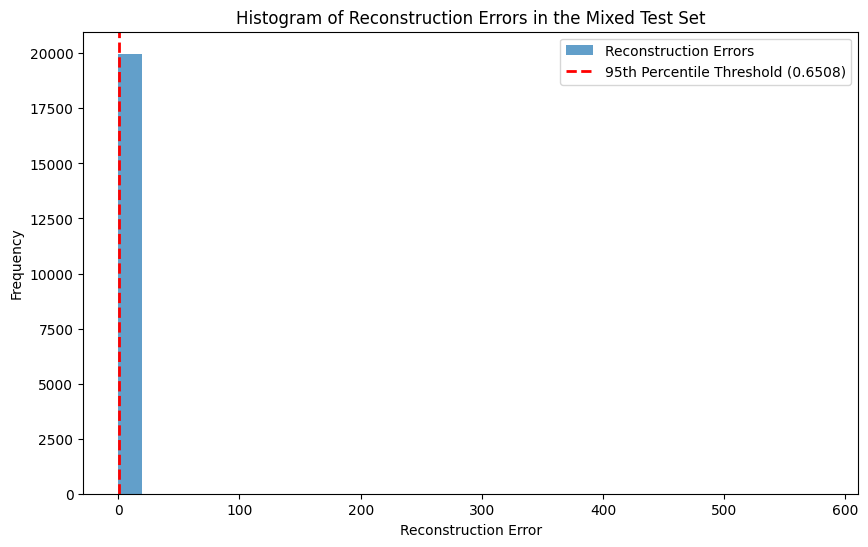

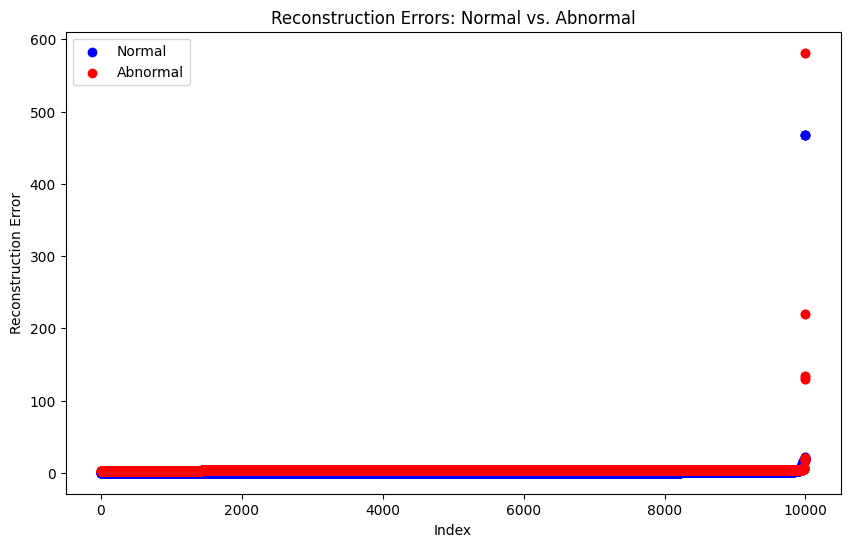

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from joblib import dump, load

# Load data (update file paths as needed)
# Ensure your datasets are loaded as pandas DataFrames
# normal_df = pd.read_csv('path/to/normal_data.csv')
# abnormal_df = pd.read_csv('path/to/abnormal_data.csv')

# Define input and encoding dimensions
# Save the DataFrames to CSV files

normal_df = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/normal_samples.csv')
abnormal_df = pd.read_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/abnormal_samples.csv')
if isinstance(normal_df, np.ndarray):
    normal_df = pd.DataFrame(normal_df)

if isinstance(abnormal_df, np.ndarray):
    abnormal_df = pd.DataFrame(abnormal_df)

input_dim = normal_df.shape[1]
encoding_dim = 4  # Adjust as needed based on experimentation

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Normalize the data using StandardScaler
scaler = StandardScaler()
normal_samples_normalized = scaler.fit_transform(normal_df)
abnormal_samples_normalized = scaler.transform(abnormal_df)

# Train the autoencoder with the normal data
autoencoder.fit(normal_samples_normalized, normal_samples_normalized, epochs=15, batch_size=32, shuffle=True, validation_split=0.2)

# Calculate reconstruction errors for normal training data
reconstructed_normal_data = autoencoder.predict(normal_samples_normalized)
reconstruction_errors_normal = np.mean(np.square(normal_samples_normalized - reconstructed_normal_data), axis=1)

# Calculate the threshold as the 90th percentile of reconstruction errors from the normal data
threshold = np.percentile(reconstruction_errors_normal, 95)

# Add binary labels to the DataFrames
normal_df['bin_label'] = 0.0  # Label 0 for normal data
abnormal_df['bin_label'] = 1.0  # Label 1 for abnormal data

# Combine normal and abnormal data to create a mixed test set
mixed_test_set = pd.concat([normal_df, abnormal_df])

# Shuffle the mixed test set
mixed_test_set = shuffle(mixed_test_set)

# Separate features and labels
mixed_test_features = mixed_test_set.drop(columns=['bin_label'])
y_test = mixed_test_set['bin_label']

# Normalize the mixed test set using the trained scaler
mixed_test_normalized = scaler.transform(mixed_test_features)

# Use the trained autoencoder to reconstruct the mixed test set
reconstructed_data = autoencoder.predict(mixed_test_normalized)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(mixed_test_normalized - reconstructed_data), axis=1)

# Classify each instance based on the threshold
predicted_labels = (reconstruction_errors > threshold).astype(int)

# Calculate and print performance metrics
print(f"Threshold: {threshold:.4f}")
print(f"Accuracy: {np.mean(predicted_labels == y_test) * 100:.2f}%")
print(classification_report(y_test, predicted_labels))

# Plot histogram of reconstruction errors in the mixed test set
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=30, alpha=0.7, label='Reconstruction Errors')
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2, label=f'95th Percentile Threshold ({threshold:.4f})')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors in the Mixed Test Set')
plt.legend()
plt.show()

# Plot reconstruction errors for normal and abnormal classes in the test set
plt.figure(figsize=(10, 6))

# Separate reconstruction errors based on the true class (normal and abnormal)
normal_errors = reconstruction_errors[y_test == 0]
abnormal_errors = reconstruction_errors[y_test == 1]

# Plot normal errors
plt.scatter(range(len(normal_errors)), np.sort(normal_errors), label='Normal', color='b')

# Plot abnormal errors
plt.scatter(range(len(abnormal_errors)), np.sort(abnormal_errors), label='Abnormal', color='r')

plt.xlabel('Index')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Errors: Normal vs. Abnormal')
plt.legend()
plt.show()

# Save the trained scaler, autoencoder model, and threshold for future use
encoder_file_path='/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/encoder.joblib'
scaler_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/scaler.joblib'  # Update this path
autoencoder_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/autoencoder_model.keras'  # Update this path
threshold_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/threshold.npy'  # Update this path

# Save the encoder
dump(encoder, encoder_file_path)

# Save the scaler
dump(scaler, scaler_file_path)

# Save the autoencoder model
autoencoder.save(autoencoder_file_path)

# Save the threshold
np.save(threshold_file_path, threshold)

# Predict Anomaly Function and Usage
# Function to predict anomaly

The results show indicate that the autoencoder model is performing very well in detecting anomalies in the dataset:

Threshold: 0.4679 – This is the 90th percentile of reconstruction errors from the normal data and is used as a decision boundary to classify data points as either normal or abnormal.

Accuracy: 95.00% – This high accuracy suggests that the model is successfully classifying most instances correctly.

Precision, Recall, F1-Score:

Class 0 (Normal):
Precision: 1.00 – This indicates that all predicted normal instances are truly normal (no false positives).
Recall: 0.90 – The model identifies 90% of normal instances correctly, with 10% false negatives.
F1-Score: 0.95 – This is a weighted average of precision and recall.
Class 1 (Abnormal):
Precision: 0.91 – This means 91% of the predicted abnormal instances are truly abnormal (a 9% false positive rate).
Recall: 1.00 – The model correctly identifies all abnormal instances (0% false negatives).
F1-Score: 0.95 – This is a weighted average of precision and recall.
Overall, the model is performing well with high precision and recall values for both normal and abnormal classes. This means the model is effectively balancing the ability to correctly identify anomalies (high recall) with minimizing false alarms (high precision).

If you are satisfied with this performance, you can use this model for further anomaly detection tasks. If not, you can consider fine-tuning the model further, adjusting the threshold, or experimenting with other architectures.

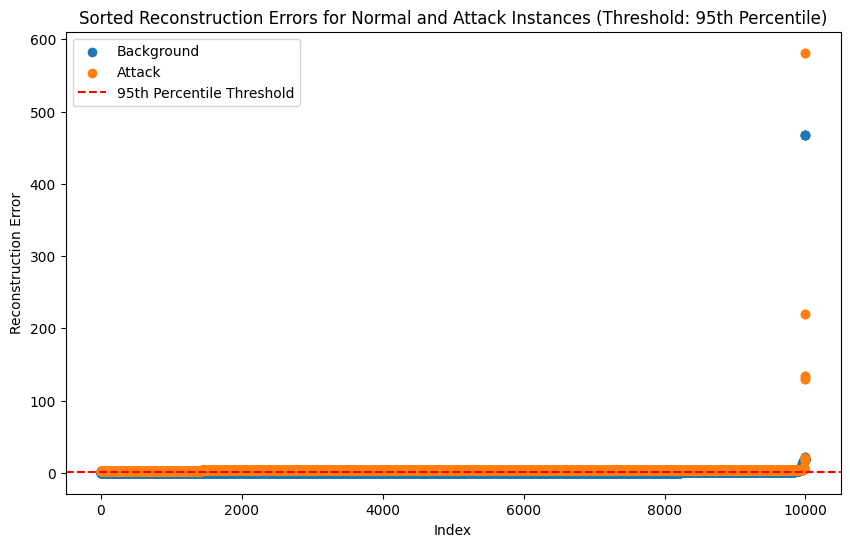

In [19]:
# Change the percentile value as needed
percentile_value = 95  # Change this value as needed (e.g., 90, 95, 99, etc.)

# Calculate the threshold as the specified percentile of reconstruction errors from the normal data
threshold = np.percentile(reconstruction_errors_normal, percentile_value)

# Plot sorted reconstruction errors for normal and attack instances
plt.figure(figsize=(10, 6))

# Plot sorted reconstruction errors for normal instances
normal_sorted_errors = np.sort(reconstruction_errors[y_test == 0])
plt.scatter(range(len(normal_sorted_errors)), normal_sorted_errors, label='Background')

# Plot sorted reconstruction errors for attack instances
abnormal_sorted_errors = np.sort(reconstruction_errors[y_test == 1])
plt.scatter(range(len(abnormal_sorted_errors)), abnormal_sorted_errors, label='Attack')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Reconstruction Error')
plt.title(f'Sorted Reconstruction Errors for Normal and Attack Instances (Threshold: {percentile_value}th Percentile)')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{percentile_value}th Percentile Threshold')
plt.legend()
plt.show()
# Predict Anomaly Function and Usage
# Function for predicting whether a new sample is an anomaly



Anomaly Threshold

We can decide on a threshold for the reconstruction error, above which a data point will be considered an 'Attack'. This threshold could be determined based on understanding of the data or simply we can use an approach like a certain percentile of the error in the normal samples.

This function encapsulates the prediction process.

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)

# Drop 'date_time' column from both datasets if it exists
normal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
abnormal_df.drop(columns=['date_time'], errors='ignore', inplace=True)

# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Combine both datasets
combined_df = pd.concat([normal_df, abnormal_df], ignore_index=True)

# Shuffle the combined dataset
combined_df = shuffle(combined_df, random_state=42)

# Exclude non-numeric columns before scaling
numeric_columns = combined_df.select_dtypes(include=np.number).columns
combined_df_numeric = combined_df[numeric_columns]

# Normalize the data using StandardScaler
scaler = StandardScaler()
combined_df_scaled = scaler.fit_transform(combined_df_numeric)

# Convert the scaled array back to a DataFrame
combined_df_normalized = pd.DataFrame(combined_df_scaled, columns=combined_df_numeric.columns)

# Save the combined, shuffled, scaled, and normalized dataset
combined_df_normalized.to_csv('/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/combined_data.csv', index=False)


***latent space representations.***
SHAP SHapley Additive exPlanations plot
SHAP (SHapley Additive exPlanations) plots are not the same as latent space representations.

SHAP values are a method used to explain the output of machine learning models by quantifying the contribution of each feature to the prediction. They provide insights into how the input features influence the model's output for a specific instance. SHAP values are calculated based on game theory concepts, specifically Shapley values, and offer a way to understand the importance of different features in the model's decision-making process.

On the other hand, latent space representations refer to the lower-dimensional representations of the input data learned by models such as autoencoders. These representations capture essential features or patterns of the data in a compressed form. While both SHAP values and latent space representations provide insights into the workings of machine learning models, they serve different purposes and are calculated differently.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from keras.models import Model

# Assuming you have your data X, autoencoder model named autoencoder,
# and normal and abnormal samples (normal_samples_normalized, abnormal_samples_normalized)

# Get the encoder part of the autoencoder model
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)  # Assuming the encoder layer is the second layer

# Encode the input data to get the latent space representation for both normal and abnormal samples
latent_normal = encoder.predict(normal_samples_normalized)
latent_abnormal = encoder.predict(abnormal_samples_normalized)

# Concatenate the latent representations and create labels
latent_combined = np.concatenate((latent_normal, latent_abnormal))
labels = np.concatenate((np.zeros(len(latent_normal)), np.ones(len(latent_abnormal))))

# Use t-SNE to reduce the dimensionality of the combined latent space representations to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
tsne_combined = tsne.fit_transform(latent_combined)

# Visualize the combined latent space representations
plt.figure(figsize=(10, 8))

# Plot normal samples in blue
plt.scatter(tsne_combined[labels == 0, 0], tsne_combined[labels == 0, 1], c='blue', label='Normal')

# Plot abnormal samples in red
plt.scatter(tsne_combined[labels == 1, 0], tsne_combined[labels == 1, 1], c='red', label='Abnormal')

plt.title('t-SNE Visualization of Latent Space Representations')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()


In the context of machine learning, particularly in the domain of neural networks and autoencoders, the "latent space" refers to a lower-dimensional representation of the input data that captures important features or patterns.

When we talk about "latent space representations," we are referring to the numerical vectors that represent data points in this lower-dimensional space. These representations are learned by the model during the training process. The term "latent" here implies that these representations are not directly observed in the input data but are inferred or "hidden" within the model.

In the case of autoencoders, the encoder part of the model compresses the input data into a latent space representation, which typically has a lower dimensionality compared to the input data. This latent representation ideally captures the most salient features of the input data necessary for reconstruction.

The quality of the latent space representations is crucial for the performance of the autoencoder. A well-designed latent space should capture meaningful and useful information about the input data, facilitating tasks such as reconstruction, denoising, or anomaly detection. Visualizing the latent space can provide insights into how the model has learned to represent the data and how it clusters or separates different classes or patterns.

In [20]:
import numpy as np
import struct
import socket
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from joblib import load
import os

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# import shap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from google.colab import drive
drive.mount('/content/drive')

# Define file paths
scaler_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/scaler.joblib'
autoencoder_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/autoencoder_model.keras'
threshold_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/threshold.npy'

# Load resources
scaler = load(scaler_file_path)
autoencoder = load_model(autoencoder_file_path)
threshold = np.load(threshold_file_path)

# Define mapping for protocol and flag
protocol_mapping = {'TCP': 0, 'UDP': 1, 'ICMP': 2}  # Define your mapping as needed
flag_mapping = {'.AP.SF': 0}  # Define your mapping as needed

def ip_to_int(ip_address):
    return struct.unpack("!I", socket.inet_aton(ip_address))[0]
def preprocess_new_sample(new_sample, scaler, protocol_mapping, flag_mapping):
    # Define the original features in the same order as used during fitting
    original_features = ['duration', 'source_ip', 'destination_ip', 'source_port',
                         'destination_port', 'forwarding_status', 'protocol',
                         'flag', 'tos', 'packets', 'bytes']

    # Ensure the new sample has the same features in the same order
    for feature in original_features:
        if feature not in new_sample:
            new_sample[feature] = 0  # Impute missing features with zeros

    # Convert dictionary to DataFrame
    new_sample_df = pd.DataFrame([new_sample])

    # Convert IP addresses to integers
    new_sample_df['source_ip'] = new_sample_df['source_ip'].apply(ip_to_int)
    new_sample_df['destination_ip'] = new_sample_df['destination_ip'].apply(ip_to_int)

    # Encode categorical features using the provided mapping dictionaries
    new_sample_df['protocol'] = new_sample_df['protocol'].map(protocol_mapping).fillna(-1)
    new_sample_df['flag'] = new_sample_df['flag'].map(flag_mapping).fillna(-1)

    # Scale numerical features using the same scaler
    # new_sample_df[original_features] = scaler.transform(new_sample_df[original_features])

    return new_sample_df


def predict_anomaly(new_sample, scaler, autoencoder, threshold):
    # Preprocess the new sample
    new_sample_df = preprocess_new_sample(new_sample, scaler, protocol_mapping, flag_mapping)

    # Predict reconstructed data using the autoencoder
    reconstructed_data = autoencoder.predict(new_sample_df)

    # Calculate reconstruction error
    reconstruction_error = np.mean(np.square(new_sample_df.values - reconstructed_data))

    # Determine if the reconstruction error exceeds the threshold
    is_anomaly = reconstruction_error > threshold

    # Return the anomaly status and reconstruction error
    return "Anomaly" if is_anomaly else "Normal", reconstruction_error

# Sample data
new_sample = {
    'duration': 0.584,
    'source_ip': '193.27.6.136',
    'destination_ip': '42.219.156.212',
    'source_port': 25,
    'destination_port': 57784,
    'forwarding_status': 0,
    'protocol': 'TCP',
    'flag': '.AP.SF',
    'tos': 0,
    'packets': 5,
    'bytes': 958
}

# Call the function and capture the output
result, reconstruction_error = predict_anomaly(new_sample, scaler, autoencoder, threshold)

# Print the result and reconstruction error
print(f"Result: {result}")
print(f"Reconstruction Error: {reconstruction_error}")
print(f"Threshold: {threshold}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 125ms/step
Result: Anomaly
Reconstruction Error: 1.0011951526538154e+18
Threshold: 0.6508095412164207


In [ ]:
import pandas as pd
import numpy as np
import socket
import struct
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)

# Drop 'label' and 'bin_label' columns
columns_to_drop = ['label', 'bin_label']
normal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
abnormal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Drop 'date_time' column if it exists
normal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
abnormal_df.drop(columns=['date_time'], errors='ignore', inplace=True)

# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    packed_ip = socket.inet_aton(ip)
    return struct.unpack("!I", packed_ip)[0]

# Apply IP conversion function to 'source_ip' and 'destination_ip' in both datasets
for df in [normal_df, abnormal_df]:
    df['source_ip'] = df['source_ip'].apply(ip_to_int)
    df['destination_ip'] = df['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Initialize mappings dictionary
mappings = {}

# Perform label encoding for categorical features and store mappings
for feature in categorical_features:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit and transform the feature in normal_samples and abnormal_samples
    normal_df[feature] = label_encoder.fit_transform(normal_df[feature])
    abnormal_df[feature] = label_encoder.fit_transform(abnormal_df[feature])
    # Store the mapping for later use
    mappings[feature] = {label: index for index, label in enumerate(label_encoder.classes_)}

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'tos', 'packets', 'bytes']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in normal samples
normal_df[numerical_features] = scaler.fit_transform(normal_df[numerical_features])

# Transform the numerical features in abnormal samples using the same scaler
abnormal_df[numerical_features] = scaler.transform(abnormal_df[numerical_features])

# Define the input dimension
input_dim = normal_df.shape[1]

# Define the generator network
generator = Sequential([
    Dense(64, input_shape=(input_dim,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

# Define the discriminator network
discriminator = Sequential([
    Dense(64, input_shape=(input_dim,), activation=LeakyReLU(alpha=0.2)),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Combine the generator and discriminator into a GAN model
discriminator.trainable = False
gan = Sequential([
    generator,
    discriminator
])

# Compile the GAN model
gan.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the GAN
batch_size = 32
epochs = 10
for epoch in range(epochs):
    for _ in range(len(normal_df) // batch_size):
        # Train discriminator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generated_data = generator.predict(noise)
        real_data = normal_df.iloc[np.random.randint(0, len(normal_df), batch_size)]
        combined_data = np.concatenate([real_data, generated_data])
        labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
        discriminator_loss = discriminator.train_on_batch(combined_data, labels)

        # Train generator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Save the trained scaler and generator model
scaler_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/scaler.joblib'
generator_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/generator_model.h5'

# Save the scaler
dump(scaler, scaler_file_path)

# Save the generator model
generator.save(generator_file_path)

# Compute Precision-Recall and ROC curve

In [ ]:
# Assuming you have an autoencoder model named 'autoencoder'
from tensorflow.keras.models import load_model

# Generate samples from the generator
num_samples = 1000

# Define the file path of the generator model
generator_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/generator_model.h5'

# Load the generator model
generator = load_model(generator_file_path)

generated_samples = generator.predict(np.random.normal(0, 1, size=(num_samples, input_dim)))

# Detect anomalies in the generated data using the trained autoencoder
anomaly_scores = autoencoder.predict(generated_samples)

# Set a threshold for anomaly detection
# Identify anomalies based on the anomaly scores and threshold
anomalies = generated_samples[np.where(anomaly_scores > threshold)]

# Now 'anomalies' contains the samples from the generated data that are detected as anomalies by the autoencoder.
# You can further analyze or process these anomalies as needed.
# Check if anomalies are detected before further processing
if len(anomalies) > 0:
    num_anomalies = len(anomalies)
    num_rows = (num_anomalies + 4) // 5  # Calculate the number of rows needed
    num_cols = min(num_anomalies, 5)     # Ensure maximum of 5 columns

    # Visualize the detected anomalies
    plt.figure(figsize=(10, 10))
    for i in range(num_anomalies):
        plt.subplot(num_rows, num_cols, i+1)
        plt.plot(anomalies[i])  # Plot each anomaly sample
        plt.title(f'Anomaly {i+1}')
        plt.xlabel('Feature Index')
        plt.ylabel('Feature Value')
    plt.tight_layout()
    plt.show()

    # Print summary statistics of the detected anomalies
    for i, anomaly in enumerate(anomalies):
        print(f"Anomaly {i+1} - Summary Statistics:")
        print(f"Mean: {np.mean(anomaly)}")
        print(f"Standard Deviation: {np.std(anomaly)}")
        print(f"Max Value: {np.max(anomaly)}")
        print(f"Min Value: {np.min(anomaly)}")
        print("\n")

    # Save the detected anomalies to a file
    anomalies_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/anomalies.csv'
    anomalies_df = pd.DataFrame(anomalies, columns=[f'Feature_{i}' for i in range(input_dim)])
    anomalies_df.to_csv(anomalies_file_path, index=False)
    print("Detected anomalies saved to:", anomalies_file_path)
else:
    print("No anomalies detected above the threshold.")


In [ ]:

import pandas as pd
import numpy as np
import socket
import struct
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the normal and abnormal datasets
normal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/background_sampleAD.csv'
abnormal_df_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/labeled_samples.csv'

normal_df = pd.read_csv(normal_df_path)
abnormal_df = pd.read_csv(abnormal_df_path)

# Drop 'label' and 'bin_label' columns
columns_to_drop = ['label', 'bin_label']
normal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)
abnormal_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Drop 'date_time' column if it exists
normal_df.drop(columns=['date_time'], errors='ignore', inplace=True)
abnormal_df.drop(columns=['date_time'], errors='ignore', inplace=True)

# Sample 10,000 instances each from normal and abnormal datasets
normal_df = normal_df.sample(n=10000, replace=True, random_state=42)
abnormal_df = abnormal_df.sample(n=10000, replace=True, random_state=42)

# Function to convert IP addresses from string to integer
def ip_to_int(ip):
    packed_ip = socket.inet_aton(ip)
    return struct.unpack("!I", packed_ip)[0]

# Apply IP conversion function to 'source_ip' and 'destination_ip' in both datasets
for df in [normal_df, abnormal_df]:
    df['source_ip'] = df['source_ip'].apply(ip_to_int)
    df['destination_ip'] = df['destination_ip'].apply(ip_to_int)

# Categorical features to be encoded
categorical_features = ['protocol', 'flag']

# Perform label encoding for categorical features and store mappings
label_encoders = {}
for feature in categorical_features:
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()
    # Fit and transform the feature in normal_samples and abnormal_samples
    normal_df[feature] = label_encoder.fit_transform(normal_df[feature])
    abnormal_df[feature] = label_encoder.fit_transform(abnormal_df[feature])
    # Store the label encoder for later use
    label_encoders[feature] = label_encoder

# Define numerical features to be scaled
numerical_features = ['duration', 'source_ip', 'destination_ip', 'source_port', 'destination_port', 'tos', 'packets', 'bytes']

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features in normal samples
normal_df[numerical_features] = scaler.fit_transform(normal_df[numerical_features])

# Transform the numerical features in abnormal samples using the same scaler
abnormal_df[numerical_features] = scaler.transform(abnormal_df[numerical_features])

# Define the input dimension
input_dim = abnormal_df.shape[1]

# Define the generator network
generator = Sequential([
    Dense(64, input_shape=(input_dim,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])

# Define the discriminator network
discriminator = Sequential([
    Dense(64, input_shape=(input_dim,), activation=LeakyReLU(alpha=0.2)),
    Dense(1, activation='sigmoid')
])

# Compile the discriminator
discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Combine the generator and discriminator into a GAN model
discriminator.trainable = False
gan = Sequential([
    generator,
    discriminator
])

# Compile the GAN model
gan.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the GAN
batch_size = 32
epochs = 10
for epoch in range(epochs):
    for _ in range(len(abnormal_df) // batch_size):
        # Train discriminator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generated_data = generator.predict(noise)
        real_data = abnormal_df.iloc[np.random.randint(0, len(abnormal_df), batch_size)]
        combined_data = np.concatenate([real_data, generated_data])
        labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
        discriminator_loss = discriminator.train_on_batch(combined_data, labels)

        # Train generator
        noise = np.random.normal(0, 1, size=(batch_size, input_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {discriminator_loss[0]}, Generator Loss: {generator_loss}")

# Save the trained generator model
generator_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/generator_modelaB.h5'
generator.save(generator_file_path)
print("Generator model saved to:", generator_file_path)

# Generate abnormal samples from the generator
num_abnormal_samples = 1000
abnormal_samples = generator.predict(np.random.normal(0, 1, size=(num_abnormal_samples, input_dim)))

# Visualize the generated abnormal samples
if len(abnormal_samples) > 0:
    num_samples = len(abnormal_samples)
    num_rows = (num_samples + 4) // 5  # Calculate the number of rows needed
    num_cols = min(num_samples, 5)     # Ensure maximum of 5 columns

    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(num_rows, num_cols, i+1)
        plt.plot(abnormal_samples[i])  # Plot each abnormal sample
        plt.title(f'Abnormal Sample {i+1}')
        plt.xlabel('Feature Index')
        plt.ylabel('Feature Value')
    plt.tight_layout()
    plt.show()

    # Save the generated abnormal samples to a file
    abnormal_samples_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/abnormal_samples.csv'
    abnormal_samples_df = pd.DataFrame(abnormal_samples, columns=[f'Feature_{i}' for i in range(input_dim)])
    abnormal_samples_df.to_csv(abnormal_samples_file_path, index=False)
    print("Generated abnormal samples saved to:", abnormal_samples_file_path)
else:
    print("No abnormal samples generated.")



In [ ]:
import numpy as np
import struct
import socket
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from joblib import load

# Define file paths
scaler_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/scaler.joblib'
autoencoder_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/autoencoder_model.keras'
threshold_file_path = '/content/drive/MyDrive/azizah_alqahtani_project/IDS_codes/threshold.npy'

# Load resources
scaler = load(scaler_file_path)
autoencoder = load_model(autoencoder_file_path)
threshold = np.load(threshold_file_path)

# Define mapping for protocol and flag
protocol_mapping = {'TCP': 0, 'UDP': 1, 'ICMP': 2}  # Define your mapping as needed
flag_mapping = {'.AP.SF': 0}  # Define your mapping as needed

def ip_to_int(ip_address):
    return struct.unpack("!I", socket.inet_aton(ip_address))[0]
def preprocess_new_sample(new_sample, scaler, protocol_mapping, flag_mapping):
    # Define the original features in the same order as used during fitting
    original_features = ['duration', 'source_ip', 'destination_ip', 'source_port',
                         'destination_port', 'forwarding_status', 'protocol',
                         'flag', 'tos', 'packets', 'bytes']

    # Ensure the new sample has the same features in the same order
    for feature in original_features:
        if feature not in new_sample:
            new_sample[feature] = 0  # Impute missing features with zeros

    # Convert dictionary to DataFrame
    new_sample_df = pd.DataFrame([new_sample])

    # Convert IP addresses to integers
    new_sample_df['source_ip'] = new_sample_df['source_ip'].apply(ip_to_int)
    new_sample_df['destination_ip'] = new_sample_df['destination_ip'].apply(ip_to_int)

    # Encode categorical features using the provided mapping dictionaries
    new_sample_df['protocol'] = new_sample_df['protocol'].map(protocol_mapping).fillna(-1)
    new_sample_df['flag'] = new_sample_df['flag'].map(flag_mapping).fillna(-1)

    # Scale numerical features using the same scaler
    # new_sample_df[original_features] = scaler.transform(new_sample_df[original_features])

    return new_sample_df


def predict_anomaly(new_sample, scaler, autoencoder, threshold):
    # Preprocess the new sample
    new_sample_df = preprocess_new_sample(new_sample, scaler, protocol_mapping, flag_mapping)

    # Predict reconstructed data using the autoencoder
    reconstructed_data = autoencoder.predict(new_sample_df)

    # Calculate reconstruction error
    reconstruction_error = np.mean(np.square(new_sample_df.values - reconstructed_data))

    # Determine if the reconstruction error exceeds the threshold
    is_anomaly = reconstruction_error > threshold

    # Return the anomaly status and reconstruction error
    return "Anomaly" if is_anomaly else "Normal", reconstruction_error

# Sample data
new_sample = {
    'duration': 0.584,
    'source_ip': '193.27.6.136',
    'destination_ip': '42.219.156.212',
    'source_port': 25,
    'destination_port': 57784,
    'forwarding_status': 0,
    'protocol': 'TCP',
    'flag': '.AP.SF',
    'tos': 0,
    'packets': 5,
    'bytes': 958
}

# Call the function and capture the output
result, reconstruction_error = predict_anomaly(new_sample, scaler, autoencoder, threshold)

# Print the result and reconstruction error
print(f"Result: {result}")
print(f"Reconstruction Error: {reconstruction_error}")
print(f"Threshold: {threshold}")
